In [1]:
import pandas as pd
col = ["subid","Mood_tense", "Mood_angry", "Mood_fatigued", "Mood_depressed", "Mood_vigorous", 
       "Mood_confused", "Fatigue_PhysicalExertion", "Fatigue_PhysicalDiscomfort", "Fatigue_LackofMotivation", "Fatigue_Sleepiness", 
       "Fatigue_LackofEnergy", "Rotation_max","SpatialSpan_max", "FeatureMatch_max", "DoubleTrouble_max",
       "Mental demand", "Physical demand", "Temporal demand", "Performance", "Effort", 
       "Frustration", "AcousticSatisfaction", "ThermalSatisfaction", "TotalSatisfaction", "Average_tmsk", "Average_HR", "LF/HF"]
data = pd.read_excel("../0_dataset_master/Experiment_edited_V7_rr_with_correction.xlsx", usecols=col)

In [2]:
import pingouin as pg
import numpy as np
corr_arr = []
for i in col[1:]:
    temp = []
    for j in col[1:]:
        if i == j:
            temp.append(1)
        else:
            res = pg.rm_corr(data=data, x=i, y=j, subject='subid')
            temp.append(res["r"]["rm_corr"])
    corr_arr.append(temp)
corr_arr = pd.DataFrame(corr_arr, columns=col[1:], index=col[1:])

c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


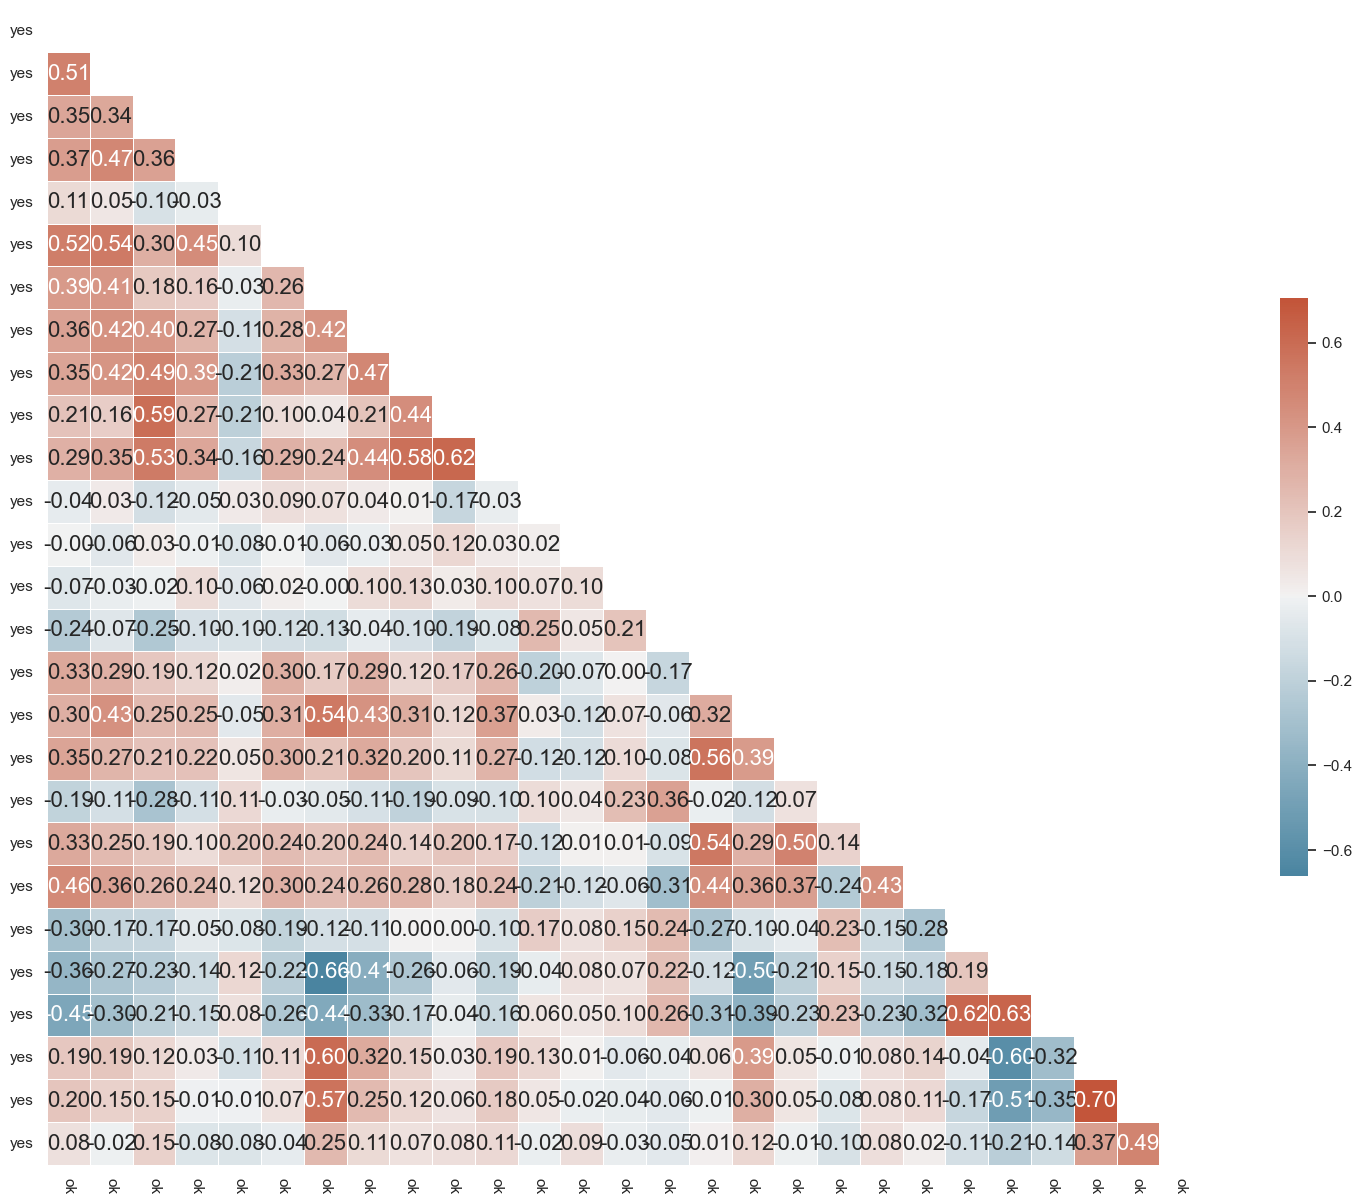

In [3]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_arr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

xtick = ["ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok"]
ytick = ["yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes"]
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_arr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, ax=ax, annot_kws={"fontsize":16}, fmt=".2f")
ax.set_yticklabels(ytick, rotation=360)
ax.set_xticklabels(xtick, rotation=270)

plt.show()

In [11]:
import pingouin as pg
import numpy as np
corr_arr = []
for i in col[1:]:
    temp = []
    for j in col[1:]:
        if i == j:
            temp.append(1)
        else:
            res = pg.rm_corr(data=data, x=i, y=j, subject='subid')
            res = res["r"]["rm_corr"]
            if res <= 0:
                res = res*-1
            temp.append(res)
    corr_arr.append(temp)
corr_arr = pd.DataFrame(corr_arr, columns=col[1:], index=col[1:])

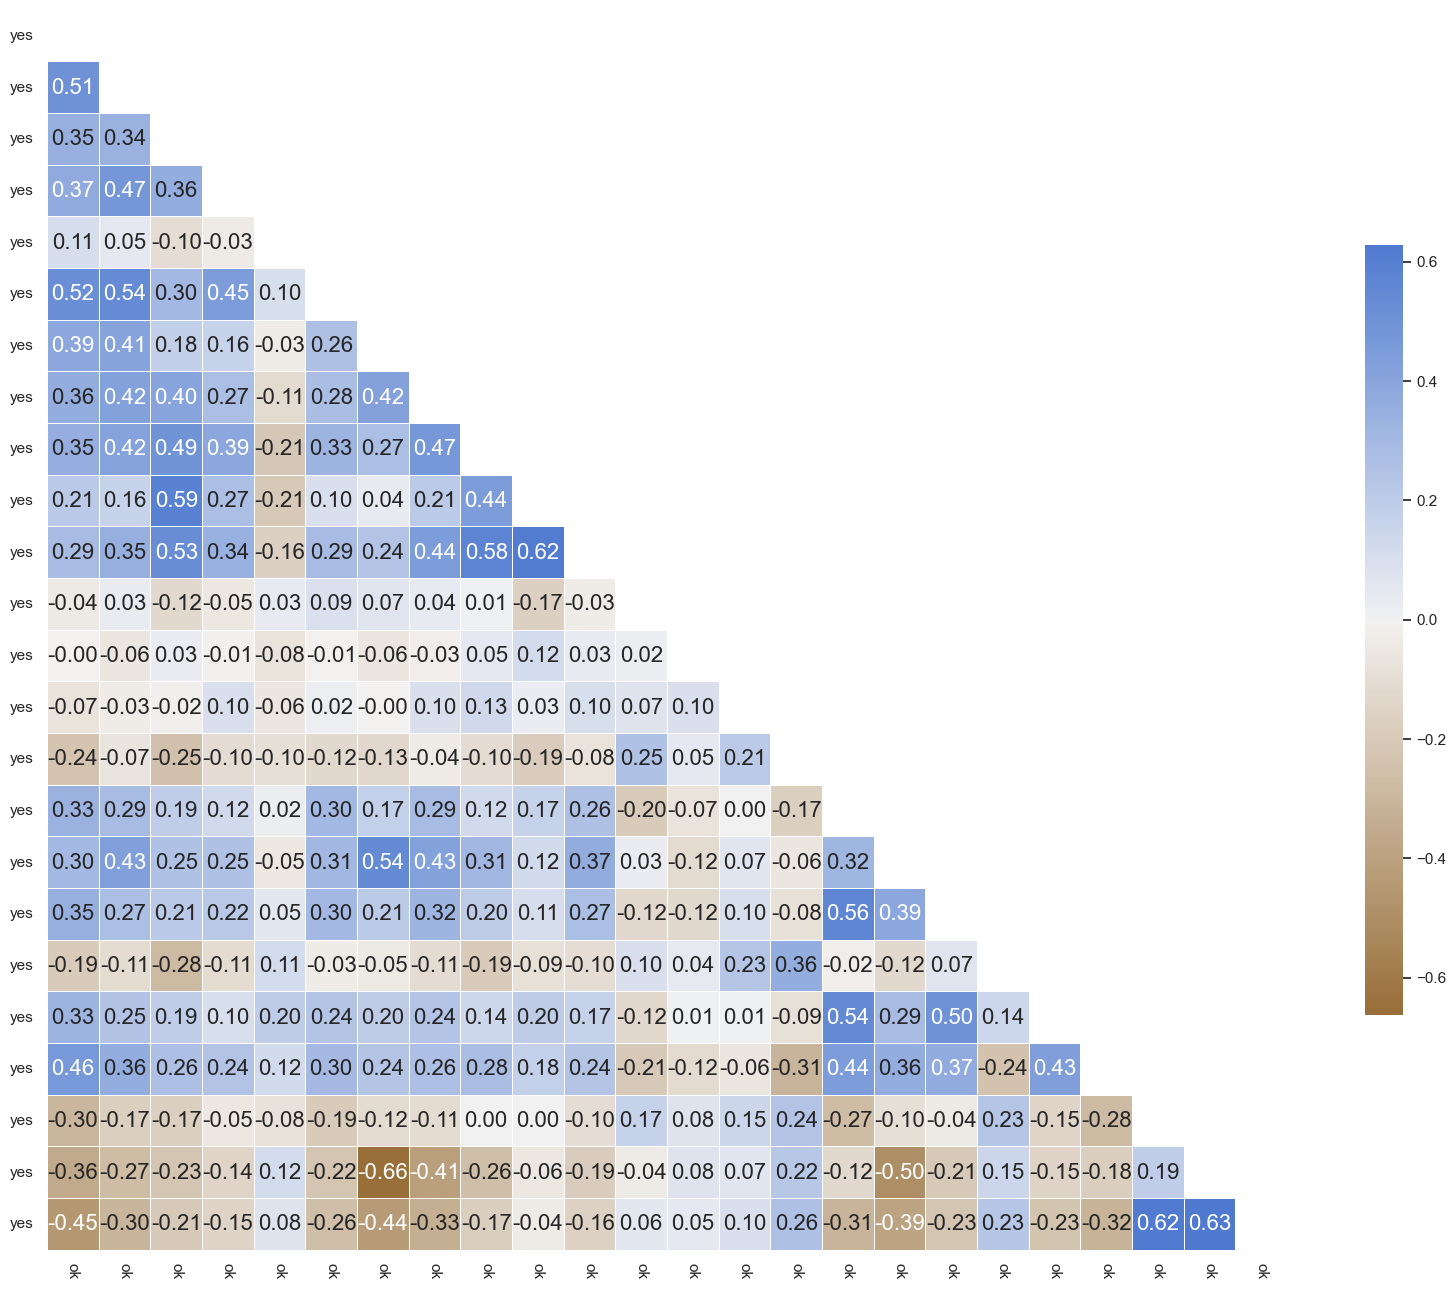

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_arr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(50, 256, as_cmap=True)

xtick = ["ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok", "ok"]
ytick = ["yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes"]
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_arr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, ax=ax, annot_kws={"fontsize":16}, fmt=".2f")
ax.set_yticklabels(ytick, rotation=360)
ax.set_xticklabels(xtick, rotation=270)


plt.show()